# Advertisment Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load csv file
advertising =  pd.read_csv("Advertising.csv")

In [3]:
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advertising.shape

(200, 5)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
advertising.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Observation:
The dataset does not contain any null values

# EDA

In [7]:
pd.set_option('precision',2)
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.97,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


Observation - the min value of Radio is zero

In [8]:
#Analysis of Zero Values in Predictors
(advertising==0).sum(axis=0)

Unnamed: 0    0
TV            0
Radio         1
Newspaper     0
Sales         0
dtype: int64

Observation - Only one row of Radio variable contain the zero value.

# Relationship - Predictor and Response

Relationship between Sales and TV

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TV', ylabel='Sales'>

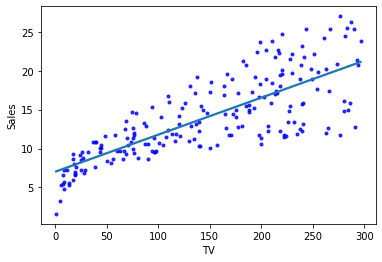

In [9]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'b','s':9})

Relationship between Sales and Radio

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


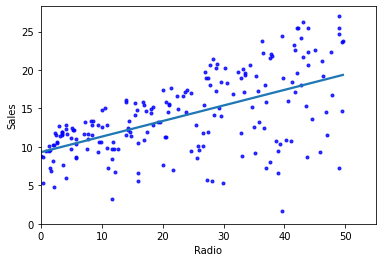

In [47]:
sns.regplot(advertising.Radio, advertising.Sales, order=1, ci=None, scatter_kws={'color':'b','s':9})
plt.xlim(0,55)
plt.ylim(bottom=0)
plt.show()

Relationship between Sales and Newspaper

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


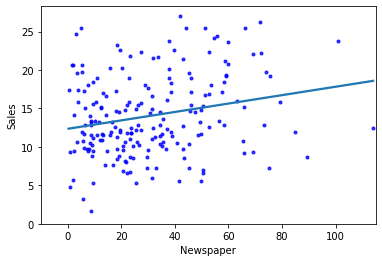

In [48]:
sns.regplot(advertising.Newspaper, advertising.Sales, order=1, ci=None, scatter_kws={'color':'b','s':9})
plt.xlim(-10,115)
plt.ylim(bottom=0)
plt.show()

# Data Normalization

In [12]:
from sklearn.preprocessing import scale
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

In [13]:
X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [14]:
X.mean()

1.0089706847793422e-14

In [15]:
X.std()

85.63933175679269

# Linear Regression (Scaled Data)

In [16]:
import sklearn.linear_model as skl_lm

In [17]:
regr = skl_lm.LinearRegression()

In [18]:
regr.fit(X,y)

LinearRegression()

In [19]:
regr.intercept_

14.0225

In [20]:
regr.coef_

array([0.04753664])

Calculate RSS

In [21]:
min_rss = np.sum((regr.intercept_+regr.coef_*X-y.values.reshape(-1,1))**2)

In [22]:
min_rss

2102.5305831313512

# Linear Regression (Unscaled Data)

In [23]:
regr = skl_lm.LinearRegression()

In [24]:
X = advertising.TV.values.reshape(-1,1)

In [25]:
y = advertising.Sales

In [26]:
regr.fit(X,y)

LinearRegression()

In [27]:
regr.intercept_

7.032593549127695

In [28]:
regr.coef_

array([0.04753664])

In [29]:
#RSS
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)

In [30]:
min_rss

2102.5305831313512

In [31]:
#MSE
mse = min_rss/len(y)

In [32]:
mse

10.512652915656757

In [33]:
#R-Square using sklearn
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
Sales_pred = regr.predict(X)

In [35]:
r2_score(y, Sales_pred)

0.611875050850071

In [36]:
#MSE using SKLearn
mean_squared_error(y, Sales_pred)

10.512652915656757

# Regression using Statsmodel

In [37]:
import statsmodels.formula.api as smf

In [38]:
est = smf.ols('Sales ~ TV', advertising).fit()

In [39]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        14:21:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Regression RSS and MSE
est.params

Intercept    7.03
TV           0.05
dtype: float64

In [41]:
#RSS
((advertising.Sales - (est.params[0]+est.params[1]*advertising.TV))**2).sum()

2102.5305831313512

In [42]:
#MSE
((advertising.Sales - (est.params[0]+est.params[1]*advertising.TV))**2).sum()/len(advertising.Sales)

10.512652915656757

# Single Linear Regression

In [43]:
#Linear Regression Sales and Radio
est = smf.ols('Sales ~ Radio',advertising).fit()

In [44]:
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [45]:
#Linear Regression Sales and Newspaper
est = smf.ols('Sales ~ Newspaper',advertising).fit()

In [46]:
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
